# TOC

 - [Introduction](0-introduction.ipynb)
 - [Simple Example](1-simple-example.ipynb)
 - [Simple Example Symbolic](2-simple-example-symblic.ipynb)
 - [Pythonic MOA Array Interface](3-lazy-arrays.ipynb)
 - [Benchmarks](4-benchmarks.ipynb)

In [1]:
from moa.frontend import parse
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.dnf import reduce_to_dnf
from moa.onf import reduce_to_onf
from moa.backend import generate_python_source

# Frontend

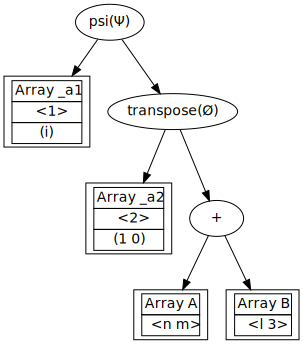

In [2]:
context = parse('<i> psi (<1 0> tran (A ^ <n m> + B ^ <l 3>))')
visualize_ast(context)

# Shape Analysis

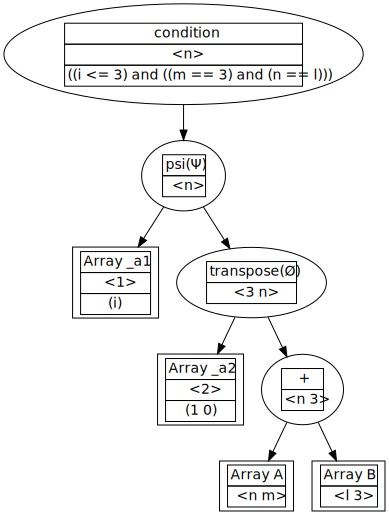

In [3]:
shape_context = calculate_shapes(context)
visualize_ast(shape_context)

# Reduction to Denotational Normalized Format (DNF)

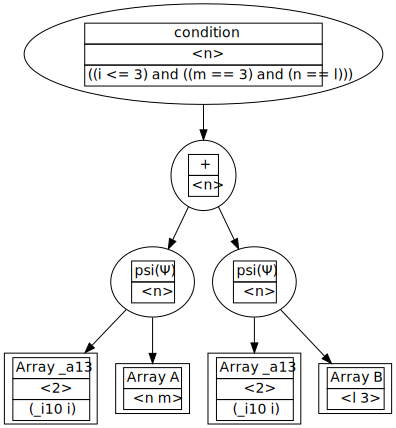

In [4]:
dnf_context = reduce_to_dnf(shape_context)
visualize_ast(dnf_context)

# Reduction to ONF

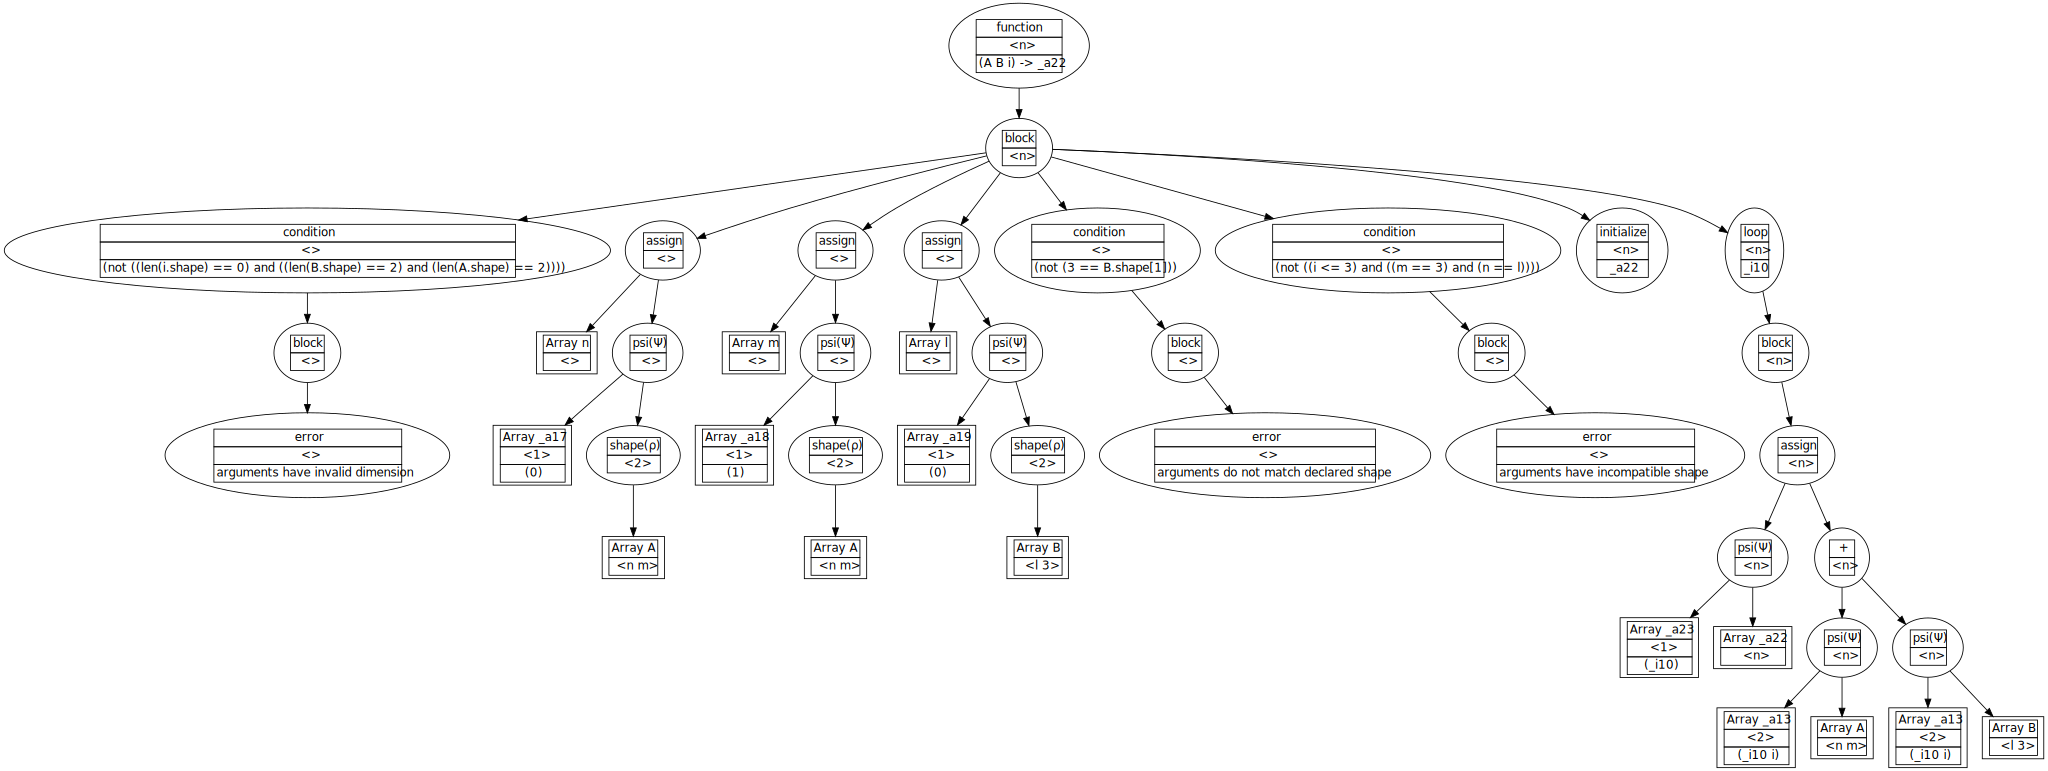

In [5]:
onf_context = reduce_to_onf(dnf_context, include_conditions=True)
visualize_ast(onf_context)

# Backend (Python)

Execute generated python source. A majority of code is for checking arrays meet conditions.

In [6]:
source = generate_python_source(onf_context, materialize_scalars=True)
print(source)



def f(A, B, i):
    
    
    if (not ((len(i.shape) == 0) and ((len(B.shape) == 2) and (len(A.shape) == 2)))):
        
        raise Exception('arguments have invalid dimension')
    
    n = A.shape[0]
    
    m = A.shape[1]
    
    l = B.shape[0]
    
    if (not (3 == B.shape[1])):
        
        raise Exception('arguments do not match declared shape')
    
    if (not ((i <= 3) and ((m == 3) and (n == l)))):
        
        raise Exception('arguments have incompatible shape')
    
    _a22 = Array((n,))
    
    for _i10 in range(0, n, 1):
        
        _a22[(_i10,)] = (A[(_i10, i)] + B[(_i10, i)])
    return _a22


In [7]:
exec(source)

In [8]:
from moa.array import Array

In [9]:
# notice how we enforce an "array interface"
A = Array((2, 3), (1, 2, 3, 4, 5, 6))
B = Array((2, 3), (7, 8, 9, 10, 11, 12))
i = Array((), (1,))

array = f(i=i, A=A, B=B)

In [10]:
array.shape

(2,)

In [11]:
array.value

[10, 16]